# Old Town Encode

In [179]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [180]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(600)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

X_test = generate_3d_data(60)
X_test = X_test - X_test.mean(axis=0, keepdims=0)

X_test[:5]

array([[-1.09818606, -0.20851961, -0.28108674],
       [ 1.12163146,  0.09860372,  0.19264747],
       [-0.37990483,  0.26397389,  0.00801782],
       [-0.89527015,  0.01449971,  0.07357128],
       [ 0.69978147, -0.52399386, -0.03009259]])

In [181]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))

In [182]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Train on 600 samples
Epoch 1/20
600/600 [==============================] - 0s 375us/sample - loss: 0.2211
Epoch 2/20
600/600 [==============================] - 0s 48us/sample - loss: 0.0162
Epoch 3/20
600/600 [==============================] - 0s 66us/sample - loss: 0.0046
Epoch 4/20
600/600 [==============================] - 0s 57us/sample - loss: 0.0045
Epoch 5/20
600/600 [==============================] - 0s 56us/sample - loss: 0.0041
Epoch 6/20
600/600 [==============================] - 0s 47us/sample - loss: 0.0041
Epoch 7/20
600/600 [==============================] - 0s 56us/sample - loss: 0.0038
Epoch 8/20
600/600 [==============================] - 0s 49us/sample - loss: 0.0034
Epoch 9/20
600/600 [==============================] - 0s 52us/sample - loss: 0.0036
Epoch 10/20
600/600 [==============================] - 0s 56us/sample - loss: 0.0033
Epoch 11/20
600/600 [==============================] - 0s 64us/sample - loss: 0.0032
Epoch 12/20
600/600 [==============================]

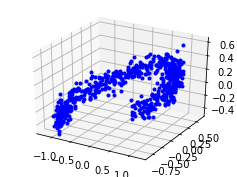

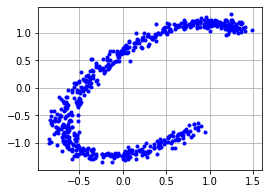

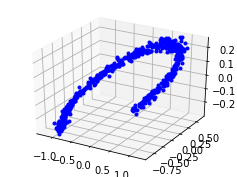

In [183]:
codings = encoder.predict(X_train)

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(4,3))
ax = plt.axes(projection='3d')
plt.plot(X_train[:,0], X_train[:, 1], X_train[:, 2], "b.")
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.grid(True)
plt.show()

decodings = decoder.predict(codings)

fig = plt.figure(figsize=(4,3))
ax = plt.axes(projection='3d')
plt.plot(decodings[:,0], decodings[:, 1], decodings[:, 2], "b.")
plt.grid(True)
plt.show()

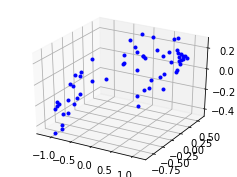

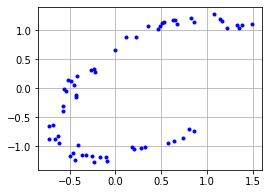

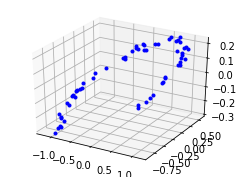

In [184]:
codings = encoder.predict(X_test)

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(4,3))
ax = plt.axes(projection='3d')
plt.plot(X_test[:,0], X_test[:, 1], X_test[:, 2], "b.")
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.grid(True)
plt.show()

decodings = decoder.predict(codings)

fig = plt.figure(figsize=(4,3))
ax = plt.axes(projection='3d')
plt.plot(decodings[:,0], decodings[:, 1], decodings[:, 2], "b.")
plt.grid(True)
plt.show()

In [185]:
test_evaluation = autoencoder.evaluate(X_test, X_test)
print("Training loss: %f%%" % history.history['loss'][-1])
print("Test loss: %f%%" % test_evaluation)

60/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================